# Debugging and visualizing data

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `MEASUREMENTS` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_SCORES` is used to debug the `user_scores` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_SCORES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_SCORES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


MEASUREMENTS False
USER_SCORES True
RECOMMENDER True


### Set up recommender system
This cell contains everything needed for setup.

In [3]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 0  # num iterations of 'exploration'
RUN_TIMESTEPS = 5  # num run iterations
NUM_ITEMS = 10 #round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; item_representation: attributes of each item
rec_args['content']['num_attributes'] = NUM_ITEMS
rec_args['content']['item_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['num_attributes']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['item_representation']):
    A = rec_args['content']['num_attributes']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['item_representation'][i,:] = row
# Add it to args
rec_args['content']['item_representation'] = rec_args['content']['item_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_SCORES - Shape: (5, 10)
USER_SCORES - Plot Histogram of users liking each item the most


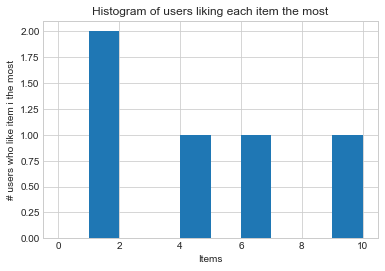

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.42 0.53 0.02 0.10 0.78 0.34 0.42 0.49 0.55 0.45]
 [0.34 0.52 0.00 0.30 0.63 0.34 0.45 0.58 0.59 0.64]
 [0.41 0.68 0.09 0.39 0.64 0.51 0.55 0.35 0.67 0.48]
 [0.62 0.76 0.04 0.17 0.65 0.62 0.77 0.52 0.61 0.49]
 [0.49 0.84 0.12 0.38 0.54 0.44 0.54 0.46 0.68 0.55]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 10
RECOMMENDER - Attributes of each item (rows):
[[1.00 0.00 1.00 1.00 0.00 0.00 1.00 

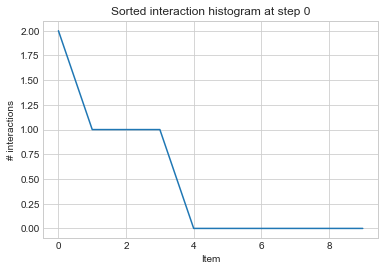

RECOMMENDER - System updates user profiles based on last interaction:
[[1 1 1 1 0 0 1 0 0 1]
 [0 1 1 1 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 1 0 0 0 0 1 1 1]
 [0 1 1 1 0 1 0 1 0 0]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.67 0.67 0.17 0.33 0.33 0.50 0.50 0.50 1.00 0.50]
 [0.40 0.60 0.00 0.40 0.60 0.40 0.60 0.60 0.60 1.00]
 [0.33 0.67 0.33 1.00 0.33 0.67 0.67 0.33 0.67 0.67]
 [0.50 1.00 0.17 0.33 0.67 0.50 0.67 0.33 0.67 0.50]
 [0.40 0.60 0.00 0.40 0.60 0.40 0.60 0.60 0.60 1.00]]
RECOMMENDER - Step 1
RECOMMENDER - Row:
[[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]]
RECOMMENDER - Indices_prime:
[[0 1 2 3 4 5 6 7 9]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 4 5 6 7 8 9]
 [0 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8]]
RECOMMENDER - Items ordered by preference for each user:
[[2 3 4 5 6 7 9 0 1]
 [2 0 3 5 1 4 6 7 8]
 [0 2 4 7 1 5 6 8 9]
 [2 3 7 0 5 9 4 6 8]
 [2 0 3 5 1 4 6 7 8]]
RECOMMENDER - Sy

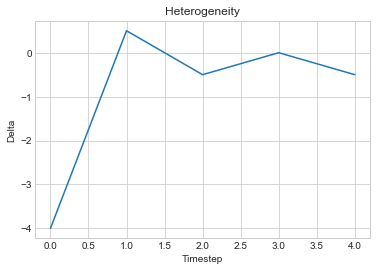

In [4]:
# Create recsys instance
rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, actual_user_scores=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
#rec.startup_and_train(timesteps=STARTUP_TIMESTEPS)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)
 # lambda function
delta_t = rec.get_heterogeneity()

### You can run the system beyond the predefined time steps:

RECOMMENDER - Run -- interleave recommendations and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - Row:
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
RECOMMENDER - Indices_prime:
[[0 2 5 6 7]
 [0 2 3 5 6]
 [1 2 4 6 9]
 [2 3 4 5 7]
 [0 2 3 4 7]]
RECOMMENDER - Items ordered by preference for each user:
[[2 7 0 5 6]
 [2 3 5 0 6]
 [2 4 9 1 6]
 [2 3 7 4 5]
 [2 3 7 4 0]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[0 5]
 [0 6]
 [6 1]
 [7 3]
 [2 0]]
USER_SCORES - User scores for given items are:
[[0.42 0.34]
 [0.34 0.45]
 [0.55 0.68]
 [0.52 0.17]
 [0.12 0.49]]
RECOMMENDER - Users choose the following items respectively:
[0 6 1 7 0]


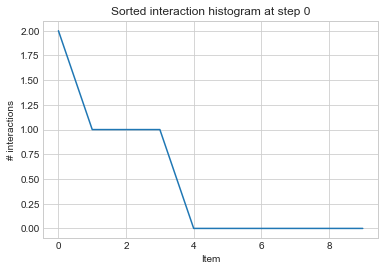

RECOMMENDER - System updates user profiles based on last interaction:
[[4 4 5 3 1 3 2 3 3 3]
 [3 4 5 3 2 3 3 5 3 3]
 [5 4 4 3 1 2 4 2 3 2]
 [4 4 5 4 1 2 4 4 3 2]
 [5 3 6 3 0 3 4 3 4 2]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.55 0.71 0.13 0.35 0.58 0.55 0.65 0.42 0.68 0.58]
 [0.50 0.68 0.09 0.29 0.62 0.50 0.65 0.50 0.62 0.59]
 [0.63 0.67 0.17 0.37 0.47 0.60 0.67 0.47 0.73 0.50]
 [0.61 0.67 0.12 0.30 0.52 0.55 0.67 0.52 0.70 0.58]
 [0.67 0.70 0.15 0.33 0.55 0.67 0.76 0.39 0.70 0.55]]
RECOMMENDER - Step 1
RECOMMENDER - Row:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
RECOMMENDER - Indices_prime:
[[2 5 6 7]
 [0 2 3 5]
 [2 4 6 9]
 [2 3 4 5]
 [2 3 4 7]]
RECOMMENDER - Items ordered by preference for each user:
[[2 7 5 6]
 [2 3 0 5]
 [2 4 9 6]
 [2 3 4 5]
 [2 3 7 4]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[6 2]
 [0 5]
 [6 2]
 [3 4]
 [4 4]]
USER_SCORES - User scores for given items are:
[[0.02 0.4

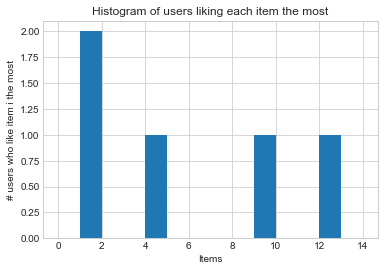

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.42 0.53 0.02 0.10 0.78 0.34 0.42 0.49 0.55 0.45 0.28 0.23 0.51 0.49]
 [0.34 0.52 0.00 0.30 0.63 0.34 0.45 0.58 0.59 0.64 0.23 0.15 0.59 0.38]
 [0.41 0.68 0.09 0.39 0.64 0.51 0.55 0.35 0.67 0.48 0.14 0.31 0.59 0.36]
 [0.62 0.76 0.04 0.17 0.65 0.62 0.77 0.52 0.61 0.49 0.21 0.09 0.90 0.26]
 [0.49 0.84 0.12 0.38 0.54 0.44 0.54 0.46 0.68 0.55 0.18 0.25 0.82 0.31]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]
 [0.58 0.67 0.15 0.35 0.56 0.60 0.71 0.44 0.65 0.54 0.23 0.21 0.79 0.29]]
RECOMMENDER - Row:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
RECOMMENDER - In

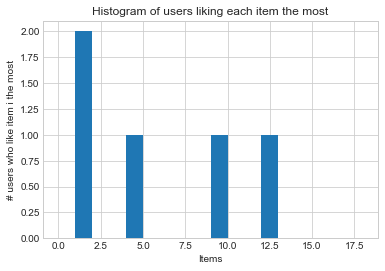

USER_SCORES - Actual scores given by users (rows) to items (columns), unknown to system:
[[0.42 0.53 0.02 0.10 0.78 0.34 0.42 0.49 0.55 0.45 0.28 0.23 0.51 0.49
  0.04 0.08 0.40 0.42]
 [0.34 0.52 0.00 0.30 0.63 0.34 0.45 0.58 0.59 0.64 0.23 0.15 0.59 0.38
  0.21 0.03 0.48 0.48]
 [0.41 0.68 0.09 0.39 0.64 0.51 0.55 0.35 0.67 0.48 0.14 0.31 0.59 0.36
  0.21 0.09 0.30 0.49]
 [0.62 0.76 0.04 0.17 0.65 0.62 0.77 0.52 0.61 0.49 0.21 0.09 0.90 0.26
  0.31 0.18 0.37 0.54]
 [0.49 0.84 0.12 0.38 0.54 0.44 0.54 0.46 0.68 0.55 0.18 0.25 0.82 0.31
  0.25 0.17 0.35 0.56]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 0.82 0.35
  0.20 0.10 0.35 0.43]
 [0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 0.82 0.35
  0.20 0.10 0.35 0.43]
 [0.60 0.68 0.15 0.33 0.55 0.58 0.68 0.43 0.68 0.53 0.25 0.23 0.80 0.33
  0.20 0.10 0.33 0.43]
 [0.62 0.67 0.13 0.32 0.55 0.58 0.68 0.45 0.68 0.57 0.28 0.20 

In [5]:
# Run for some more time steps
rec.run(timesteps=10, train_between_steps=True, measurement_visualization_rule=lambda x: x % 50 == 0)

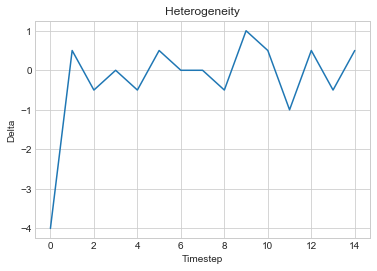

In [6]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()